In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
data = pd.read_csv("C:/Users/Adityaram/OneDrive/Desktop/Mall-Customers-Segmentation-main (1)/Mall-Customers-Segmentation-main/Dataset/Mall_Customers.csv")


# First 5 rows

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Dist. of Income

Text(16.819444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

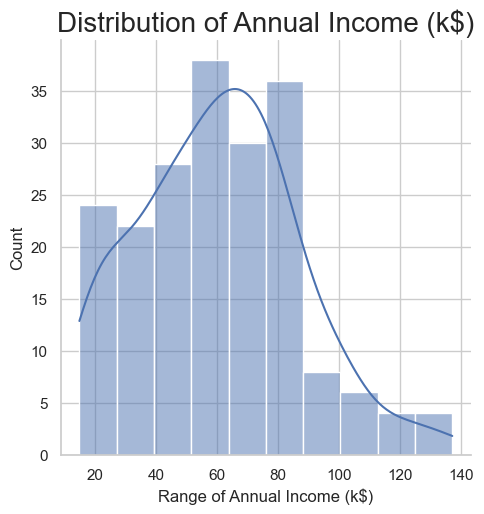

In [9]:
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.displot(data['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

# Dist. of Age

Text(16.819444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

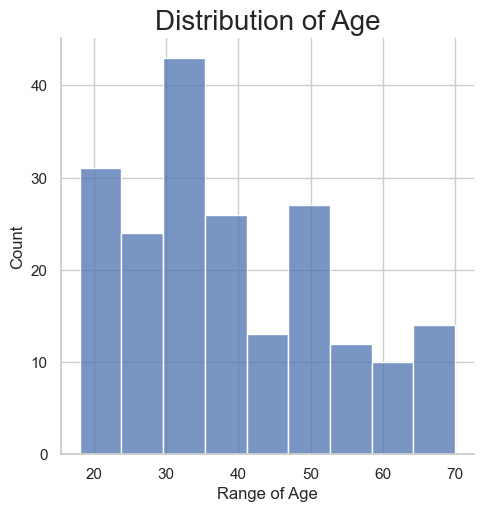

In [11]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

# Dist. of Spending Score

Text(16.819444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

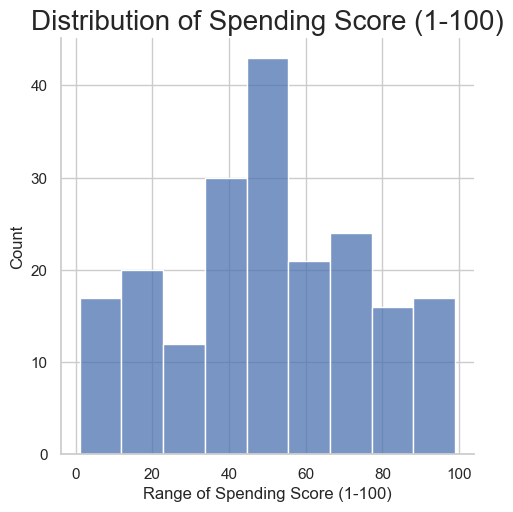

In [14]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

# Bar Plot showing Gender Distribution

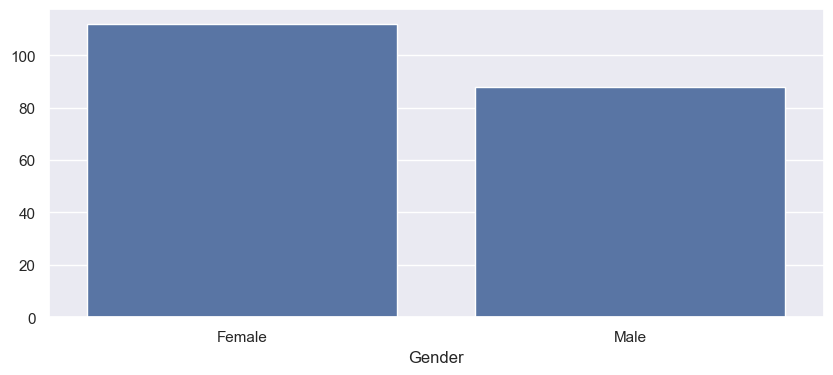

In [15]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [16]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [17]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#  Annual Income vs Spending Score

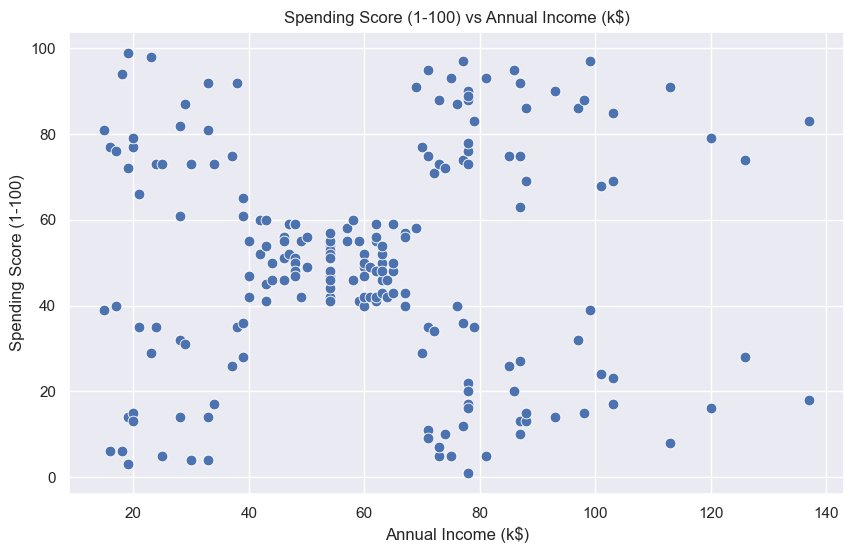

In [18]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 

plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# KMeans ALGORITHM

In [19]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [21]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)


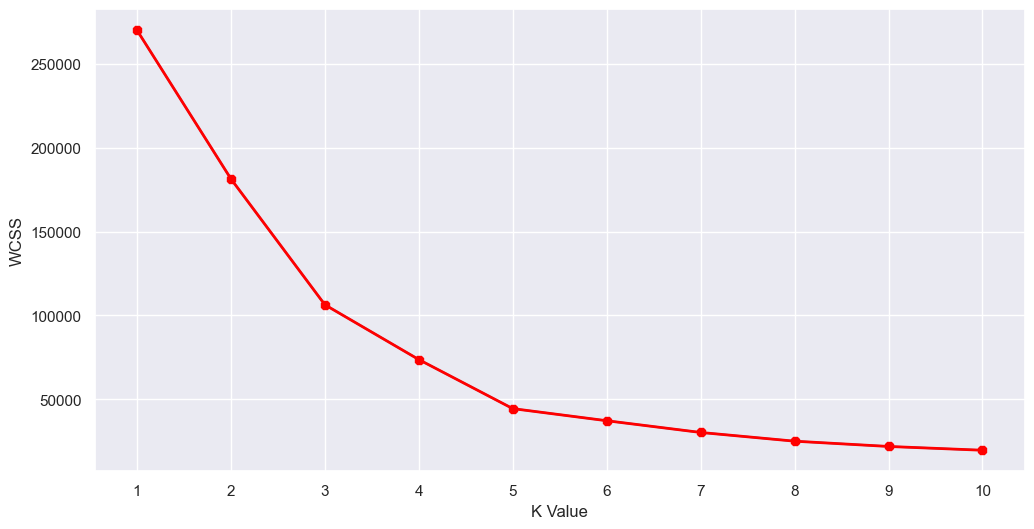

In [22]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [24]:

km1 = KMeans(n_clusters=5, n_init=10)
km1.fit(X)
y = km1.predict(X)
df1["label"] = y
df1.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


# Scatterplot after KMeans Clustering

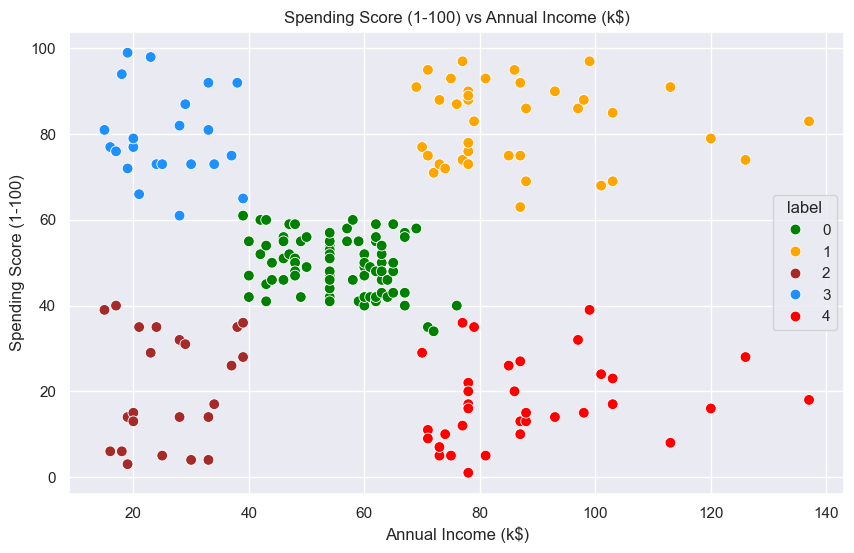

In [25]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

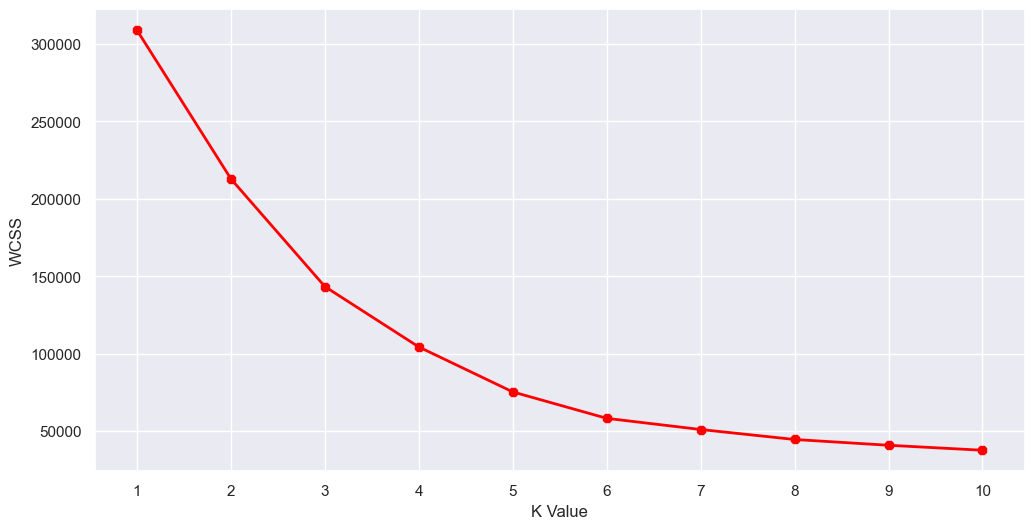

In [27]:
# Taking the features
X2 = df1[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Calculating the Within Cluster Sum of Squared Errors (WSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)  # Set n_init explicitly
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

# Plotting WCSS
plt.figure(figsize=(12, 6))    
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()


# Choosing Number of Clusters (here, 5)

In [28]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df1["label"] = y2
#The data with labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,9
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,9


 # 3D Plot of Clustering Results

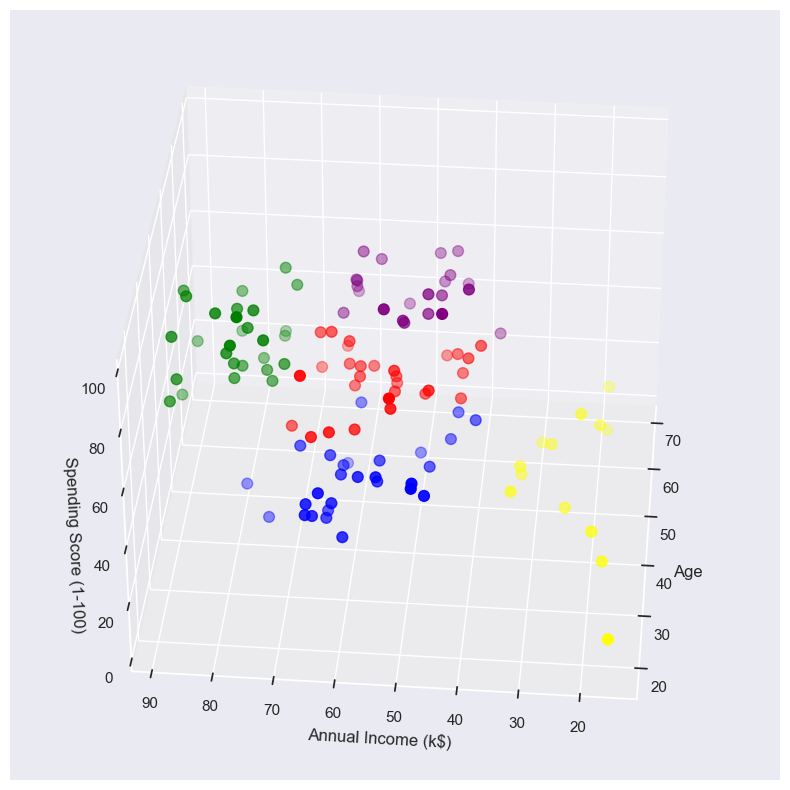

In [29]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# Customer Segmentation - Final Output

In [30]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 29
They are - [ 47  51  55  56  57  60  67  72  77  78  80  82  84  86  90  93  94  97
  99 102 105 108 113 118 119 120 122 123 127]
--------------------------------------------
Number of customer in 2nd group= 28
They are - [ 44  52  53  59  62  66  69  70  76  79  85  88  89  92  95  96  98 100
 101 104 106 112 114 115 116 121 133 143]
--------------------------------------------
Number of customer in 3rd group= 22
They are - [ 41  54  58  61  63  64  65  68  71  73  74  75  81  83  87  91 103 107
 109 110 111 117]
--------------------------------------------
Number of customer in 4th group= 28
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178]
--------------------------------------------
Number of customer in 5th group= 13
They are - [ 3  7  9 11 13 15 19 23 25 31 33 35 37]
--------------------------------------------
